In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('complessivo_rms_finale.csv', parse_dates=True, index_col='id')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291
id,,,,,,,,,,,,,,,,,,,,,
2,0.005965,0.030530,0.038409,0.052510,0.081335,0.096664,0.092021,0.083451,0.083296,0.086539,...,0.167174,0.126127,0.111858,0.095006,0.099327,0.097803,0.107587,0.152822,0.177150,0.000000
3,0.009710,0.088201,0.120011,0.128533,0.150989,0.169258,0.205793,0.261233,0.279276,0.259404,...,0.126499,0.103162,0.147984,0.207548,0.256682,0.254089,0.194205,0.146202,0.119663,0.121850
5,0.004292,0.036312,0.051975,0.046670,0.203390,0.283229,0.314644,0.322023,0.293859,0.251127,...,0.318426,0.312173,0.305558,0.281919,0.234308,0.178978,0.163058,0.143980,0.120217,0.107188
10,0.110271,0.142744,0.156790,0.131847,0.125279,0.129176,0.128395,0.171358,0.298087,0.304533,...,0.296138,0.217364,0.184314,0.176318,0.161866,0.158079,0.158619,0.148111,0.146005,0.000000
20,0.245351,0.239747,0.211342,0.181047,0.184478,0.177384,0.142504,0.206317,0.242042,0.226818,...,0.333991,0.285059,0.176683,0.181024,0.188473,0.168699,0.164692,0.181571,0.183699,0.000000


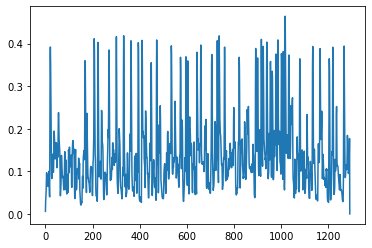

In [3]:
ts = df[df.index==2].T.values
plt.plot(ts)
plt.show()

In [4]:
df0 = pd.read_csv('flat_df_no_nulli.csv', index_col=0)
indici_rock = df0[df0["TRACK_genre_top"] == "Rock"].index
indici_classical  = df0[df0["TRACK_genre_top"] == "Classical"].index

df_rock = df[df.index.isin(indici_rock)]
df_rock = df_rock.dropna()
df_rock = df_rock.drop(df_rock[df_rock["0"] == 0].index)
df_rock= df_rock[:1000].iloc[:, :400]

df_classical = df[df.index.isin(indici_classical)]
df_classical = df_classical.dropna()
df_classical = df_classical[:1000].iloc[:, 400:800]

In [5]:
df_rock

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
id,,,,,,,,,,,,,,,,,,,,,
135,0.039399,0.155741,0.224995,0.229158,0.221785,0.212066,0.195280,0.196297,0.205402,0.200371,...,0.202655,0.221800,0.232580,0.229326,0.249407,0.279059,0.283611,0.267411,0.248800,0.238953
136,0.026358,0.166937,0.228532,0.220507,0.241647,0.270459,0.288961,0.273775,0.296030,0.315402,...,0.282356,0.379487,0.380163,0.363719,0.425935,0.460265,0.403716,0.319780,0.272504,0.225111
151,0.211138,0.265498,0.305813,0.297590,0.278039,0.274378,0.309063,0.310496,0.315388,0.318920,...,0.267530,0.238090,0.234440,0.241016,0.211950,0.244889,0.237782,0.271818,0.308224,0.243920
152,0.114834,0.148596,0.170719,0.178162,0.201264,0.215299,0.237624,0.260459,0.262258,0.254296,...,0.221240,0.232639,0.223770,0.207889,0.194382,0.191997,0.208135,0.204769,0.196006,0.185192
153,0.119883,0.157615,0.175584,0.185572,0.203404,0.231554,0.269754,0.268405,0.247971,0.238228,...,0.185078,0.209016,0.217071,0.231579,0.241346,0.215182,0.267075,0.307412,0.271292,0.254902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,0.010232,0.070966,0.105002,0.094652,0.073807,0.064211,0.055006,0.123540,0.194180,0.182843,...,0.134282,0.094078,0.092118,0.079328,0.069914,0.061075,0.056310,0.051856,0.052501,0.061222
4171,0.040285,0.047653,0.053804,0.056695,0.058669,0.056635,0.053683,0.053348,0.057277,0.056668,...,0.065786,0.065880,0.065752,0.060156,0.057444,0.058169,0.054632,0.199540,0.255020,0.204471
4172,0.016565,0.121915,0.169916,0.127677,0.055779,0.052644,0.120171,0.142311,0.104002,0.073267,...,0.049053,0.092983,0.136157,0.135624,0.095756,0.055900,0.052699,0.052996,0.051268,0.049042


In [57]:
df_classical

,400,401,402,403,404,405,406,407,408,409,...,790,791,792,793,794,795,796,797,798,799
id,,,,,,,,,,,,,,,,,,,,,
4850,-0.470646,-0.363424,-0.287667,-0.289913,-0.410487,-0.592165,-0.682645,-0.709040,-0.717323,-0.740577,...,-0.490633,-0.405483,-0.389666,-0.373250,-0.304877,-0.199567,-0.228229,-0.359782,-0.398066,-0.374114
4851,-0.251309,-0.373156,-0.409113,-0.046395,0.043005,0.143622,0.382656,0.215251,0.168761,0.219951,...,-0.429227,-0.399424,-0.435345,-0.503503,-0.507449,-0.519343,-0.546781,-0.588946,-0.636506,-0.633028
148643,-0.374897,-0.214110,-0.159355,-0.329960,-0.203618,0.208063,0.285372,0.342317,0.540306,0.226141,...,-0.232325,-0.152348,-0.089474,-0.321734,-0.108485,-0.200240,-0.396884,-0.470594,-0.598327,-0.392929
148644,-0.720163,-0.753403,-0.582491,-0.879335,-1.027444,-0.747425,-0.811989,-1.127940,-1.128740,-0.808839,...,0.725000,0.692821,0.495262,0.504547,0.944962,1.527782,1.643607,1.019958,0.494295,0.319234
148645,-0.318694,-0.520339,-0.741869,-1.048398,-0.913248,-0.761417,-0.765191,-0.449576,-0.300295,-0.446656,...,-2.067397,-1.974093,-1.854546,-1.813131,-1.994113,-2.156800,-2.226227,-2.358358,-2.372430,-2.225358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116416,1.115652,1.232586,1.557569,1.315967,1.099778,1.151327,0.800673,0.924134,0.905926,0.368409,...,-1.223437,-1.502704,-1.206299,-0.737364,-0.344899,-0.186293,-0.623204,-0.944011,-0.883723,-0.887684
116511,0.304957,0.163645,-0.175931,-0.299275,-0.451055,-0.238478,0.115073,0.233944,0.562504,0.912740,...,2.800977,3.069208,3.031824,2.646652,1.569707,0.074857,-0.760231,-0.793107,0.119098,0.851228
116513,0.545940,0.142797,-0.178608,-0.368873,-0.466348,-0.620614,0.452633,0.835053,0.188721,-0.358588,...,-1.084026,1.737294,3.329379,2.662563,1.064023,0.237551,-0.443282,-0.491252,-0.687989,-0.571206


In [6]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [7]:
#Amplitude scaling df
scaler = TimeSeriesScalerMeanVariance(mu=0, std=1.)
df_rock = df_rock.T.apply(lambda x: scaler.fit_transform(x.values.reshape(1, -1)).flatten()).T
df_classical = df_classical.T.apply(lambda x: scaler.fit_transform(x.values.reshape(1, -1)).flatten()).T


In [8]:
# SAX transform
n_paa_segments = 120
n_sax_symbols = 40
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax_rock = sax.fit_transform(df_rock.values)[:,:,0]
ts_sax_classical = sax.fit_transform(df_classical.values)[:,:,0]

sax_ts_inv_rock = sax.inverse_transform(ts_sax_rock)
sax_ts_inv_classical = sax.inverse_transform(ts_sax_classical)

C:\Users\39327\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1000 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\39327\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1000 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\39327\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1000 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\39327\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1000 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [9]:
ts_sax_rock

array([[ 0,  9,  3, ..., 22, 28,  3],
       [ 0, 10, 26, ..., 31, 19,  8],
       [25, 31, 37, ..., 30, 32, 17],
       ...,
       [17, 11, 22, ...,  5,  3, 29],
       [ 4,  6, 20, ...,  7, 22, 31],
       [ 9, 11,  8, ..., 30, 26, 13]])

In [10]:
ts_sax_classical

array([[14, 13,  9, ..., 34, 32, 30],
       [14, 20, 24, ...,  9, 19, 22],
       [16, 18, 26, ...,  7,  8,  9],
       ...,
       [22, 12, 27, ..., 12, 13,  7],
       [24, 14, 15, ...,  4,  4,  1],
       [16, 39, 23, ..., 13, 19,  6]])

In [11]:
map_symbols_rock = {k: v for v, k in enumerate(np.unique(sax_ts_inv_rock.ravel()))}
map_symbols_rock 
inv_map_rock = {v: k for k, v in map_symbols_rock.items()}
map_symbols_classical = {k: v for v, k in enumerate(np.unique(sax_ts_inv_classical.ravel()))}
map_symbols_classical 
inv_map_classical = {v: k for k, v in map_symbols_classical.items()}

In [12]:
map_symbols_rock

{-2.241402727604945: 0,
 -1.7804643416920256: 1,
 -1.5341205443525463: 2,
 -1.3563117453352471: 3,
 -1.213339622488518: 4,
 -1.0916203674341678: 5,
 -0.984234960446325: 6,
 -0.887146559018876: 7,
 -0.7977768461252381: 8,
 -0.7143674402801876: 9,
 -0.6356570136975827: 10,
 -0.5607030318750833: 11,
 -0.4887764111146695: 12,
 -0.419295753041396: 13,
 -0.35178434493515626: 14,
 -0.2858408748811656: 15,
 -0.22111871299757055: 16,
 -0.1573106846101707: 17,
 -0.0941374143235364: 18,
 -0.03133798202142662: 19,
 0.0: 20,
 0.03133798202142648: 21,
 0.0941374143235364: 22,
 0.1573106846101707: 23,
 0.22111871299757055: 24,
 0.2858408748811657: 25,
 0.3517843449351561: 26,
 0.419295753041396: 27,
 0.4887764111146695: 28,
 0.5607030318750833: 29,
 0.6356570136975828: 30,
 0.7143674402801873: 31,
 0.7977768461252381: 32,
 0.887146559018876: 33,
 0.984234960446325: 34,
 1.0916203674341685: 35,
 1.2133396224885171: 36,
 1.3563117453352471: 37,
 1.5341205443525463: 38,
 1.7804643416920256: 39,
 2.24140

In [13]:
#seq = np.array([map_symbols[v] for v in sax_ts_inv.ravel()])

In [14]:
#seq

# Sequential Pattern Mining

In [15]:
!pip install prefixspan

In [16]:
from prefixspan import PrefixSpan

https://github.com/chuanconggao/PrefixSpan-py
    
https://pypi.org/project/prefixspan/

In [17]:
ps_rock = PrefixSpan(ts_sax_rock)

In [18]:
ps_classical = PrefixSpan(ts_sax_classical)

In [38]:
ps_rock.frequent(500, filter = lambda p,m: len(p)>2)

[(544, [9, 4, 13]),
 (516, [9, 4, 27]),
 (552, [9, 4, 8]),
 (533, [9, 4, 5]),
 (538, [9, 4, 10]),
 (526, [9, 4, 24]),
 (502, [9, 4, 28]),
 (547, [9, 4, 14]),
 (528, [9, 4, 23]),
 (521, [9, 4, 4]),
 (518, [9, 4, 15]),
 (516, [9, 4, 21]),
 (544, [9, 4, 19]),
 (538, [9, 4, 7]),
 (515, [9, 4, 26]),
 (525, [9, 4, 6]),
 (525, [9, 4, 17]),
 (531, [9, 4, 16]),
 (512, [9, 4, 25]),
 (534, [9, 4, 12]),
 (529, [9, 4, 18]),
 (501, [9, 4, 22]),
 (556, [9, 4, 9]),
 (522, [9, 4, 20]),
 (515, [9, 4, 11]),
 (604, [9, 13, 27]),
 (584, [9, 13, 30]),
 (661, [9, 13, 8]),
 (571, [9, 13, 5]),
 (684, [9, 13, 10]),
 (621, [9, 13, 24]),
 (611, [9, 13, 28]),
 (678, [9, 13, 14]),
 (636, [9, 13, 23]),
 (604, [9, 13, 32]),
 (597, [9, 13, 31]),
 (524, [9, 13, 4]),
 (663, [9, 13, 15]),
 (555, [9, 13, 37]),
 (645, [9, 13, 21]),
 (659, [9, 13, 19]),
 (635, [9, 13, 7]),
 (618, [9, 13, 26]),
 (600, [9, 13, 6]),
 (655, [9, 13, 13]),
 (658, [9, 13, 17]),
 (663, [9, 13, 16]),
 (627, [9, 13, 25]),
 (579, [9, 13, 33]),
 (674, 

In [41]:
len(ps_rock.frequent(500, filter = lambda p,m: len(p)>2))

29860

In [39]:
ps_classical.frequent(500, filter = lambda p,m: len(p)>2)

[(655, [14, 13, 9]),
 (640, [14, 13, 8]),
 (664, [14, 13, 12]),
 (507, [14, 13, 12, 10]),
 (670, [14, 13, 10]),
 (643, [14, 13, 13]),
 (666, [14, 13, 11]),
 (641, [14, 13, 15]),
 (577, [14, 13, 19]),
 (619, [14, 13, 7]),
 (519, [14, 13, 26]),
 (516, [14, 13, 30]),
 (527, [14, 13, 25]),
 (569, [14, 13, 22]),
 (559, [14, 13, 23]),
 (552, [14, 13, 24]),
 (586, [14, 13, 20]),
 (517, [14, 13, 39]),
 (502, [14, 13, 27]),
 (576, [14, 13, 6]),
 (519, [14, 13, 5]),
 (622, [14, 13, 16]),
 (624, [14, 13, 14]),
 (568, [14, 13, 21]),
 (595, [14, 13, 17]),
 (502, [14, 13, 29]),
 (591, [14, 13, 18]),
 (675, [14, 9, 8]),
 (513, [14, 9, 8, 9]),
 (516, [14, 9, 8, 8]),
 (507, [14, 9, 8, 11]),
 (504, [14, 9, 8, 7]),
 (677, [14, 9, 9]),
 (531, [14, 9, 9, 8]),
 (512, [14, 9, 9, 9]),
 (637, [14, 9, 12]),
 (659, [14, 9, 10]),
 (638, [14, 9, 13]),
 (658, [14, 9, 11]),
 (607, [14, 9, 15]),
 (555, [14, 9, 19]),
 (656, [14, 9, 7]),
 (502, [14, 9, 26]),
 (505, [14, 9, 25]),
 (539, [14, 9, 22]),
 (541, [14, 9, 23])

In [40]:
len(ps_classical.frequent(500, filter = lambda p,m: len(p)>2))

9790

In [30]:
result_classical=ps_classical.topk(10, filter = lambda p,m: len(p)>2)
result_classical

[(728, [39, 39, 39]),
 (722, [9, 8, 9]),
 (721, [12, 9, 9]),
 (720, [12, 10, 9]),
 (718, [9, 9, 8]),
 (716, [14, 12, 10]),
 (714, [13, 12, 10]),
 (712, [9, 9, 9]),
 (712, [10, 9, 9]),
 (712, [12, 11, 10])]

In [43]:
result_rock=ps_rock.topk(10, filter = lambda p,m: len(p)>2)
result_rock

[(700, [9, 8, 10]),
 (698, [9, 9, 8]),
 (698, [9, 9, 9]),
 (697, [9, 9, 13]),
 (696, [9, 8, 9]),
 (695, [10, 9, 8]),
 (694, [9, 9, 10]),
 (693, [9, 9, 14]),
 (691, [10, 8, 9]),
 (690, [14, 12, 10])]

In [44]:
support_list=[]
pattern_list=[]
for i in result_rock:
    support_list.append(i[0])
    pattern_list.append(i[1])

In [45]:
pattern_inv_list=[]
for i in pattern_list:
    tmp=[]
    for j in i:
        tmp.append(inv_map_rock[j])
        
    pattern_inv_list.append(tmp)    

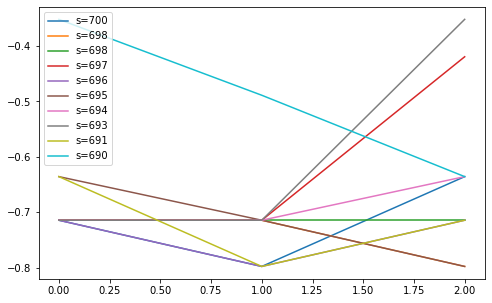

In [50]:
plt.figure(figsize=[8,5])

for i in range(len(support_list)):
    plt.plot(np.squeeze(pattern_inv_list[i]), label= 's='+ str(support_list[i]))
plt.legend() 
plt.show()

In [52]:
support_list=[]
pattern_list=[]
for i in result_classical:
    support_list.append(i[0])
    pattern_list.append(i[1])

In [54]:
pattern_inv_list=[]
for i in pattern_list:
    tmp=[]
    for j in i:
        tmp.append(inv_map_classical[j])
        
    pattern_inv_list.append(tmp)    

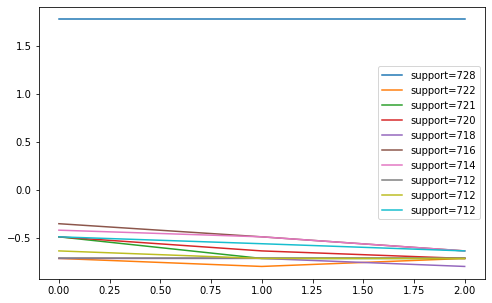

In [55]:
plt.figure(figsize=[8,5])

for i in range(len(support_list)):
    plt.plot(np.squeeze(pattern_inv_list[i]), label= 'support='+ str(support_list[i]))
    
plt.legend() 
plt.show()